## Forest Fires in Brazil data analysis

CRISP-DM

1. Business Understanding

 - What's the overview of the forest fires during the last two decades?
 - Which state has the largest number of forest fires?
 - Which month has the largest number of forest fires?
 - Which year has the largest number of forest fires?


2. Data Understanding

we used the forest fire data from kaggle, this dateset contains 5 columns, which shows the number of forest fires happened in different states, different year and month, and the exact date.

3. Prepare Data

This is commonly denoted as 80% of the process. the whole process including replace the language to english, and some visualization about the initial understanding on the dataset.

4. Model Data

this dataset is too simple to be modeled, we don't have enough variable to build any model

5. Results

Results are the findings from our wrangling and modeling. They are the answers you found to each of the questions.

6. Deploy

Deploying can occur by moving your approach into production or by using your results to persuade others within a company to act on the results. Communication is such an important part of the role of a data scientist.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# word cloud library
from wordcloud import WordCloud


import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("amazon.csv",encoding="ISO-8859-1")

In [3]:
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [7]:
### replace the month with english
#creating a dictionary with translations of months
month_map={'Janeiro': 'January', 'Fevereiro': 'February', 'Março': 'March', 'Abril': 'April', 'Maio': 'May',
          'Junho': 'June', 'Julho': 'July', 'Agosto': 'August', 'Setembro': 'September', 'Outubro': 'October',
          'Novembro': 'November', 'Dezembro': 'December'}
#mapping our translated months
df['month']=df['month'].map(month_map)
#checking the month column for the second time after the changes were made
df.month.unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [4]:
### handling of missing values and categorical variables.

In [5]:
df.isna().sum()
### no nan value in the whole dataframe

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [6]:
### if have nan values
df.dropna(inplace = True)

In [ ]:
### how to handle categorical variables
cat_cols_lst = ["state","month"]
def create_dummy_df(df, cat_cols, dummy_na):
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df
df_new = create_dummy_df(df, cat_cols_lst, dummy_na=False)

### visualization

In [8]:
df['state'].value_counts()

Rio                 717
Mato Grosso         478
Paraiba             478
Alagoas             240
Goias               239
Ceara               239
Roraima             239
Sao Paulo           239
Bahia               239
Tocantins           239
Pará                239
Rondonia            239
Distrito Federal    239
Maranhao            239
Amazonas            239
Espirito Santo      239
Pernambuco          239
Amapa               239
Acre                239
Santa Catarina      239
Minas Gerais        239
Sergipe             239
Piau                239
Name: state, dtype: int64

In [9]:
latitude={'Acre':-9.02,'Alagoas':-9.57,'Amapa':02.05,'Amazonas':-5.00,'Bahia':-12.00,'Ceara':-5.00,
          
          'Distrito Federal':-15.45,'Espirito Santo':-20.00,'Goias':-15.55,'Maranhao':-5.00,'Mato Grosso':-14.00
          
          ,'Minas Gerais':-18.50,'Pará':-3.20,'Paraiba':-7.00,'Pernambuco':-8.00,'Piau':-7.00,'Rio':-22.90,
          
          'Rondonia':-11.00,'Roraima':-2.00,'Santa Catarina':-27.25,'Sao Paulo':-23.32,'Sergipe':-10.30,
         
         'Tocantins':-10.00
         }


longitude={
    'Acre':-70.8120,'Alagoas':-36.7820,'Amapa':-50.50,'Amazonas':-65.00,'Bahia':-42.00,'Ceara':-40.00,
    
    'Distrito Federal':-47.45,'Espirito Santo':-40.45,'Goias':-50.10,'Maranhao':-46.00,'Mato Grosso':-55.00,
    
    'Minas Gerais':-46.00,'Pará':-52.00,'Paraiba':-36.00,'Pernambuco':-37.00,'Piau':-73.00, 'Rio':-43.17,
    
    'Rondonia':-63.00,'Roraima':-61.30,'Santa Catarina':-48.30,'Sao Paulo':-46.37,'Sergipe':-37.30,
    
    'Tocantins':-48.00
}

In [10]:
df['latitude']=df['state'].map(latitude)
df['longitude']=df['state'].map(longitude)
df 

,year,state,month,number,date,latitude,longitude
0,1998,Acre,January,0.0,1998-01-01,-9.02,-70.812
1,1999,Acre,January,0.0,1999-01-01,-9.02,-70.812
2,2000,Acre,January,0.0,2000-01-01,-9.02,-70.812
3,2001,Acre,January,0.0,2001-01-01,-9.02,-70.812
4,2002,Acre,January,0.0,2002-01-01,-9.02,-70.812
5,2003,Acre,January,10.0,2003-01-01,-9.02,-70.812
6,2004,Acre,January,0.0,2004-01-01,-9.02,-70.812
7,2005,Acre,January,12.0,2005-01-01,-9.02,-70.812
8,2006,Acre,January,4.0,2006-01-01,-9.02,-70.812
9,2007,Acre,January,0.0,2007-01-01,-9.02,-70.812


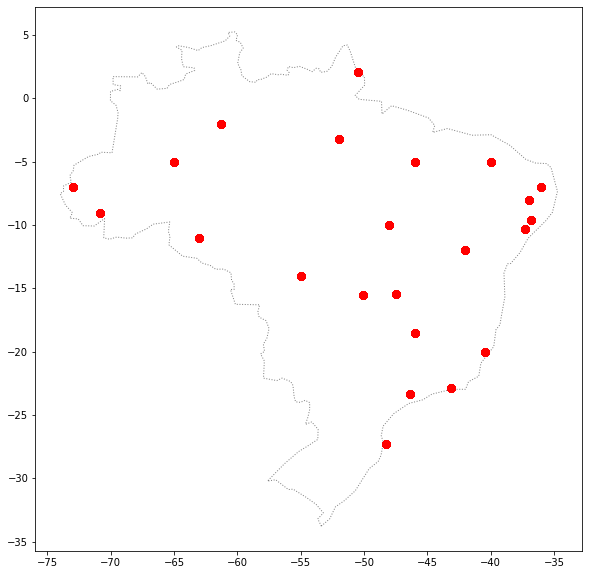

In [11]:
import seaborn as sns
import plotly.express as px
import geopandas as gpd


fire_file_gpd=gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df['longitude'],df['latitude']))
fire_file_gpd.crs={'init':'epsg:4326'}

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
americas = world.loc[world['continent'].isin([ 'South America'])]
americas=americas.loc[americas['name']=='Brazil']

ax = americas.plot(figsize=(10,10), color='white', linestyle=':', edgecolor='gray')
fire_file_gpd.plot(ax=ax, markersize=50,color='red')

### sum by state

In [12]:
total_state_fires=df.groupby('state')# gropuing dataframe state wise

states_names=list(df.state.unique())# name of each state present in Dataset

top_5_states_numbers=[]# to hold the numbers for TOP 5 places that caught most fires from 1998 to 2017
top_5_states_names=[]# to hold the names for TOP 5 places that caught most fires from 1998 to 2017


for state in states_names:
    top_5_states_numbers.append(total_state_fires.get_group(state).number.sum())
    # sum of all fires that took place in each state from 1998 to 2017
    top_5_states_names.append(state)
    
    
df_total_fires=pd.DataFrame(data={'States':top_5_states_names,
                                 'Total_Fires':top_5_states_numbers},columns=['States','Total_Fires'])

df_total_fires=df_total_fires.sort_values(['Total_Fires'],ascending=False).iloc[:5]

In [13]:
def plot_bar():
    """
    this function is mainly for plot the number of fires for each state
    input variable:none
    output:barplot
    """
    sns.set_style('darkgrid')
    plt.figure(figsize=(15,7))
    sns.barplot(df_total_fires.States,df_total_fires.Total_Fires,palette='winter')
    plt.xlabel('STATES',fontsize=20)
    plt.ylabel('HIGHEST NUMBER OF FIRES',fontsize=15)
    plt.show()

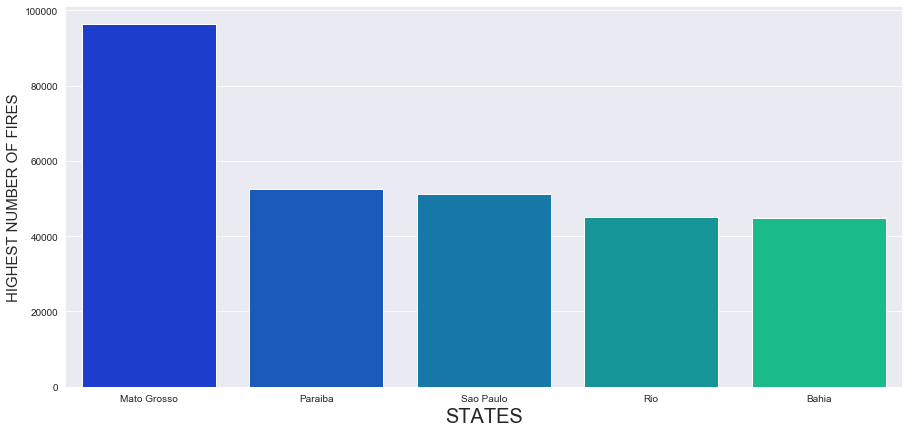

In [14]:
# sns.set_style('darkgrid')
# plt.figure(figsize=(15,7))
# sns.barplot(df_total_fires.States,df_total_fires.Total_Fires,palette='winter')
# plt.xlabel('STATES',fontsize=20)
# plt.ylabel('HIGHEST NUMBER OF FIRES',fontsize=15)
plot_bar()

### sum by year

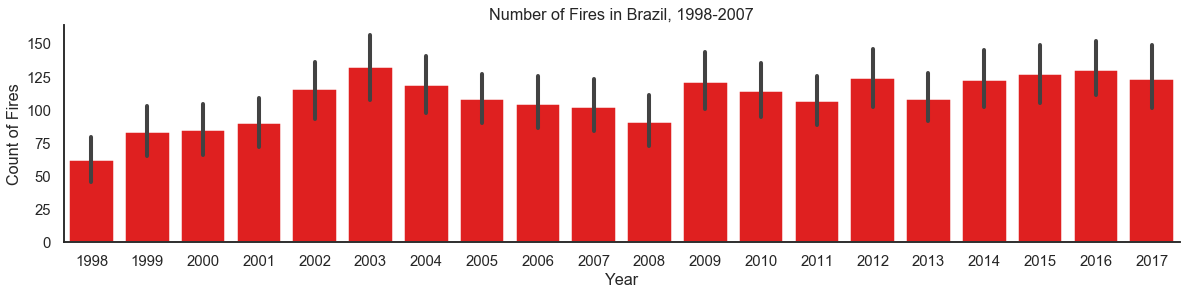

In [24]:
fig = plt.figure(figsize = (20,4))
sns.set_style('white') # sets background style as white, other 4 options are whitegrid, dark, darkgrid,ticks 
sns.set_context('talk', font_scale = 0.9) # sets the scale/size of the chart. Other 4 options are paper << notebook << talk <<  poster
yearly_chart = sns.barplot(x = 'year', y = 'number', data = df, color = 'red')
yearly_chart.set(xlabel = 'Year', ylabel = 'Count of Fires', Title = 'Number of Fires in Brazil, 1998-2007')
sns.despine()

### sum by month

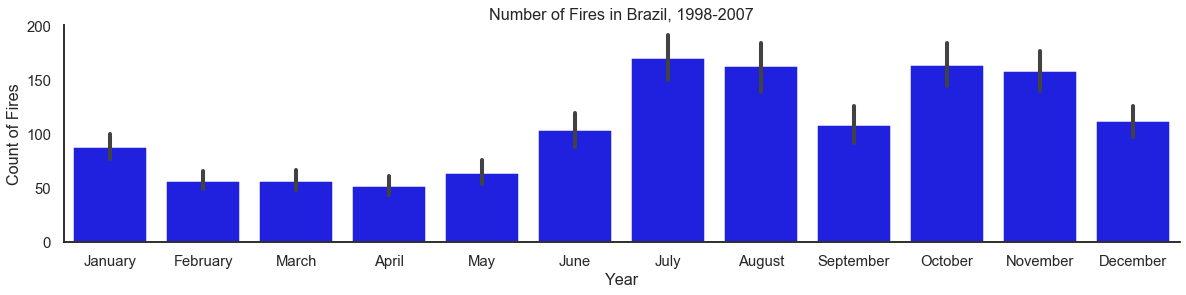

In [26]:
fig = plt.figure(figsize = (20,4))
sns.set_style('white') # sets background style as white, other 4 options are whitegrid, dark, darkgrid,ticks 
sns.set_context('talk', font_scale = 0.9) # sets the scale/size of the chart. Other 4 options are paper << notebook << talk <<  poster
yearly_chart = sns.barplot(x = 'month', y = 'number', data = df, color = 'blue')
yearly_chart.set(xlabel = 'Month', ylabel = 'Count of Fires', Title = 'Number of Fires in Brazil, 1998-2007')
sns.despine()

In [ ]:
### try to find out is there any relationship between temp and fires 

In [31]:
month_number={'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5,
               'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10,
               'November': 11, 'December': 12}
df['Month No.'] = df.month.map(month_number)

In [32]:
df['month'].value_counts()

January      541
July         540
October      540
March        540
August       540
May          540
June         540
September    540
February     540
November     540
April        540
December     513
Name: month, dtype: int64

In [33]:
df

,year,state,month,number,date,latitude,longitude,geometry,Month No.
0,1998,Acre,January,0.0,1998-01-01,-9.02,-70.812,POINT (-70.81200 -9.02000),1
1,1999,Acre,January,0.0,1999-01-01,-9.02,-70.812,POINT (-70.81200 -9.02000),1
2,2000,Acre,January,0.0,2000-01-01,-9.02,-70.812,POINT (-70.81200 -9.02000),1
3,2001,Acre,January,0.0,2001-01-01,-9.02,-70.812,POINT (-70.81200 -9.02000),1
4,2002,Acre,January,0.0,2002-01-01,-9.02,-70.812,POINT (-70.81200 -9.02000),1
5,2003,Acre,January,10.0,2003-01-01,-9.02,-70.812,POINT (-70.81200 -9.02000),1
6,2004,Acre,January,0.0,2004-01-01,-9.02,-70.812,POINT (-70.81200 -9.02000),1
7,2005,Acre,January,12.0,2005-01-01,-9.02,-70.812,POINT (-70.81200 -9.02000),1
8,2006,Acre,January,4.0,2006-01-01,-9.02,-70.812,POINT (-70.81200 -9.02000),1
9,2007,Acre,January,0.0,2007-01-01,-9.02,-70.812,POINT (-70.81200 -9.02000),1


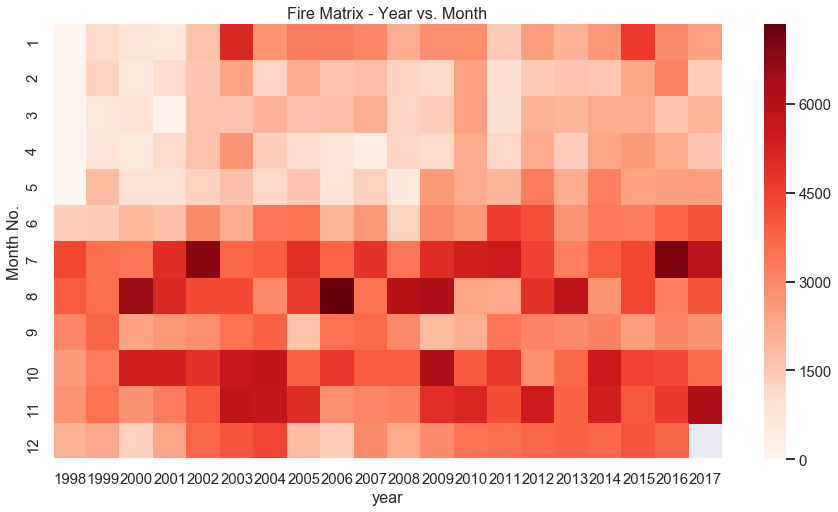

In [34]:
fig = plt.figure(figsize = (15,8))
sns.set_style('dark')
sns.set_context('talk', font_scale = 0.9)
year_month_matrix = sns.heatmap(df.pivot_table(index = 'Month No.', columns = 'year',values = 'number',aggfunc='sum'), cmap = 'Reds')
year_month_matrix.set(title = 'Fire Matrix - Year vs. Month')
sns.despine()